In [318]:
import pandas as pd
bike = pd.read_csv('/Users/shkhader/DataScience/DataScience/NoorDheen/bike/bike_share.csv')
#bike = bike.query("holiday != 0  | workingday != 0 ")

# X VALUES : bike[['season','holiday','workingday','weather','temp','humidity','windspeed']
# Y VALUES : bike['count']
#  R SQUARE VALUE : 25.896020226656713

In [331]:
r2_score(actual_count,model_pred_count) * 100

25.896020226656713

In [260]:
bike.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
52,1,0,1,1,5.74,6.820,50,12.9980,1,63,64
53,1,0,1,1,5.74,6.060,50,19.0012,1,153,154
54,1,0,1,1,6.56,6.820,43,26.0027,7,81,88
55,1,0,1,1,7.38,8.335,43,16.9979,11,33,44
56,1,0,1,1,8.20,9.090,40,22.0028,10,41,51


bike.describe()

In [243]:
bike.query("temp > 20 & temp < 30 & registered > 150 & holiday == 0   ")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
822,1,0,1,2,23.78,27.275,32,19.9995,18,256,274
823,1,0,1,2,22.14,25.760,42,19.0012,11,211,222
845,1,0,1,1,27.06,31.060,36,19.0012,68,164,232
846,1,0,1,1,27.06,31.060,34,23.9994,52,275,327
847,1,0,1,1,26.24,31.060,33,22.0028,29,195,224
...,...,...,...,...,...,...,...,...,...,...,...
10660,4,0,1,2,20.50,24.240,94,15.0013,31,179,210
10661,4,0,1,2,20.50,24.240,87,11.0014,29,207,236
10662,4,0,1,2,20.50,24.240,88,7.0015,37,308,345
10665,4,0,1,1,21.32,25.000,77,19.0012,18,409,427


In [319]:
bike.count()

season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [300]:
bike.query(" season == 4  and holiday == 1 and workingday == 0 ")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4271,4,1,0,1,20.50,24.240,94,0.0000,11,42,53
4272,4,1,0,1,19.68,23.485,88,0.0000,4,30,34
4273,4,1,0,1,19.68,23.485,88,0.0000,4,15,19
4274,4,1,0,1,18.86,22.725,88,0.0000,2,9,11
4275,4,1,0,1,18.86,22.725,94,0.0000,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...
10257,4,1,0,1,22.14,25.760,73,19.0012,30,323,353
10258,4,1,0,2,21.32,25.000,77,19.0012,31,273,304
10259,4,1,0,3,22.14,25.760,73,15.0013,10,145,155
10260,4,1,0,1,21.32,25.000,77,16.9979,12,100,112


In [261]:
from sklearn.linear_model import LinearRegression  

In [262]:
model = LinearRegression()

In [326]:
model.fit(bike[['season','holiday','workingday','weather','temp','humidity','windspeed']],bike['count'])

LinearRegression()

In [330]:
 model.coef_

array([ 22.89197864, -11.10273192,  -1.73707007,   5.56029192,
         7.87461441,  -3.03126996,   0.56723977])

In [329]:
model.intercept_

148.82984595455179

In [327]:
model_pred_count = model.predict(bike[['season','holiday','workingday','weather','temp','humidity','windspeed']])

In [328]:
actual_count = bike['count']

In [308]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [309]:
mean_absolute_error(actual_count,model_pred_count)

98.72073019068473

In [310]:
SSE = mean_squared_error(actual_count,model_pred_count)

In [179]:
# SSR
import numpy as np
SSR = np.sqrt(mean_squared_error(actual_count, model_pred_count)) #RMSE

In [166]:
# SST 
SST = SSR + SSE


In [167]:
SSR/SST

0.007319461280879942

In [216]:
import matplotlib.pyplot as plt 

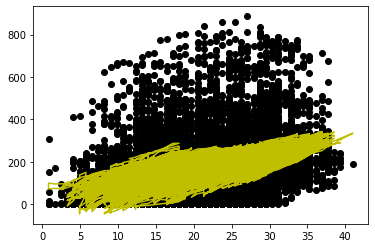

In [314]:
plt.scatter(bike[['temp']],bike[['registered']], color='black')
plt.plot(bike[['temp']],model_pred_count,color='y')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- registered bikes')

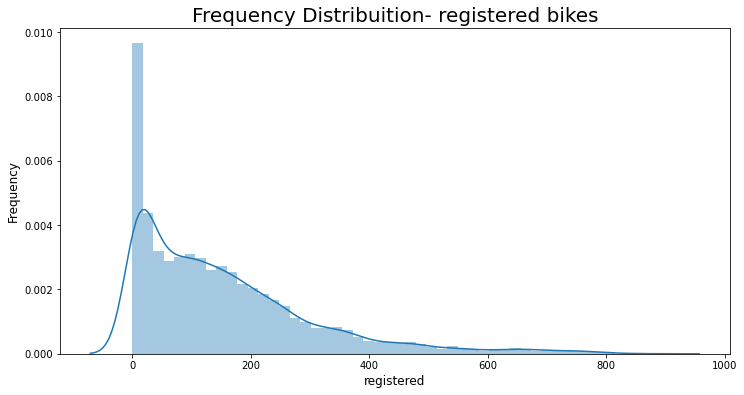

In [301]:
plt.figure(figsize=(12,6))
g = sns.distplot(bike["registered"])
g.set_xlabel("registered", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- registered bikes", fontsize=20)

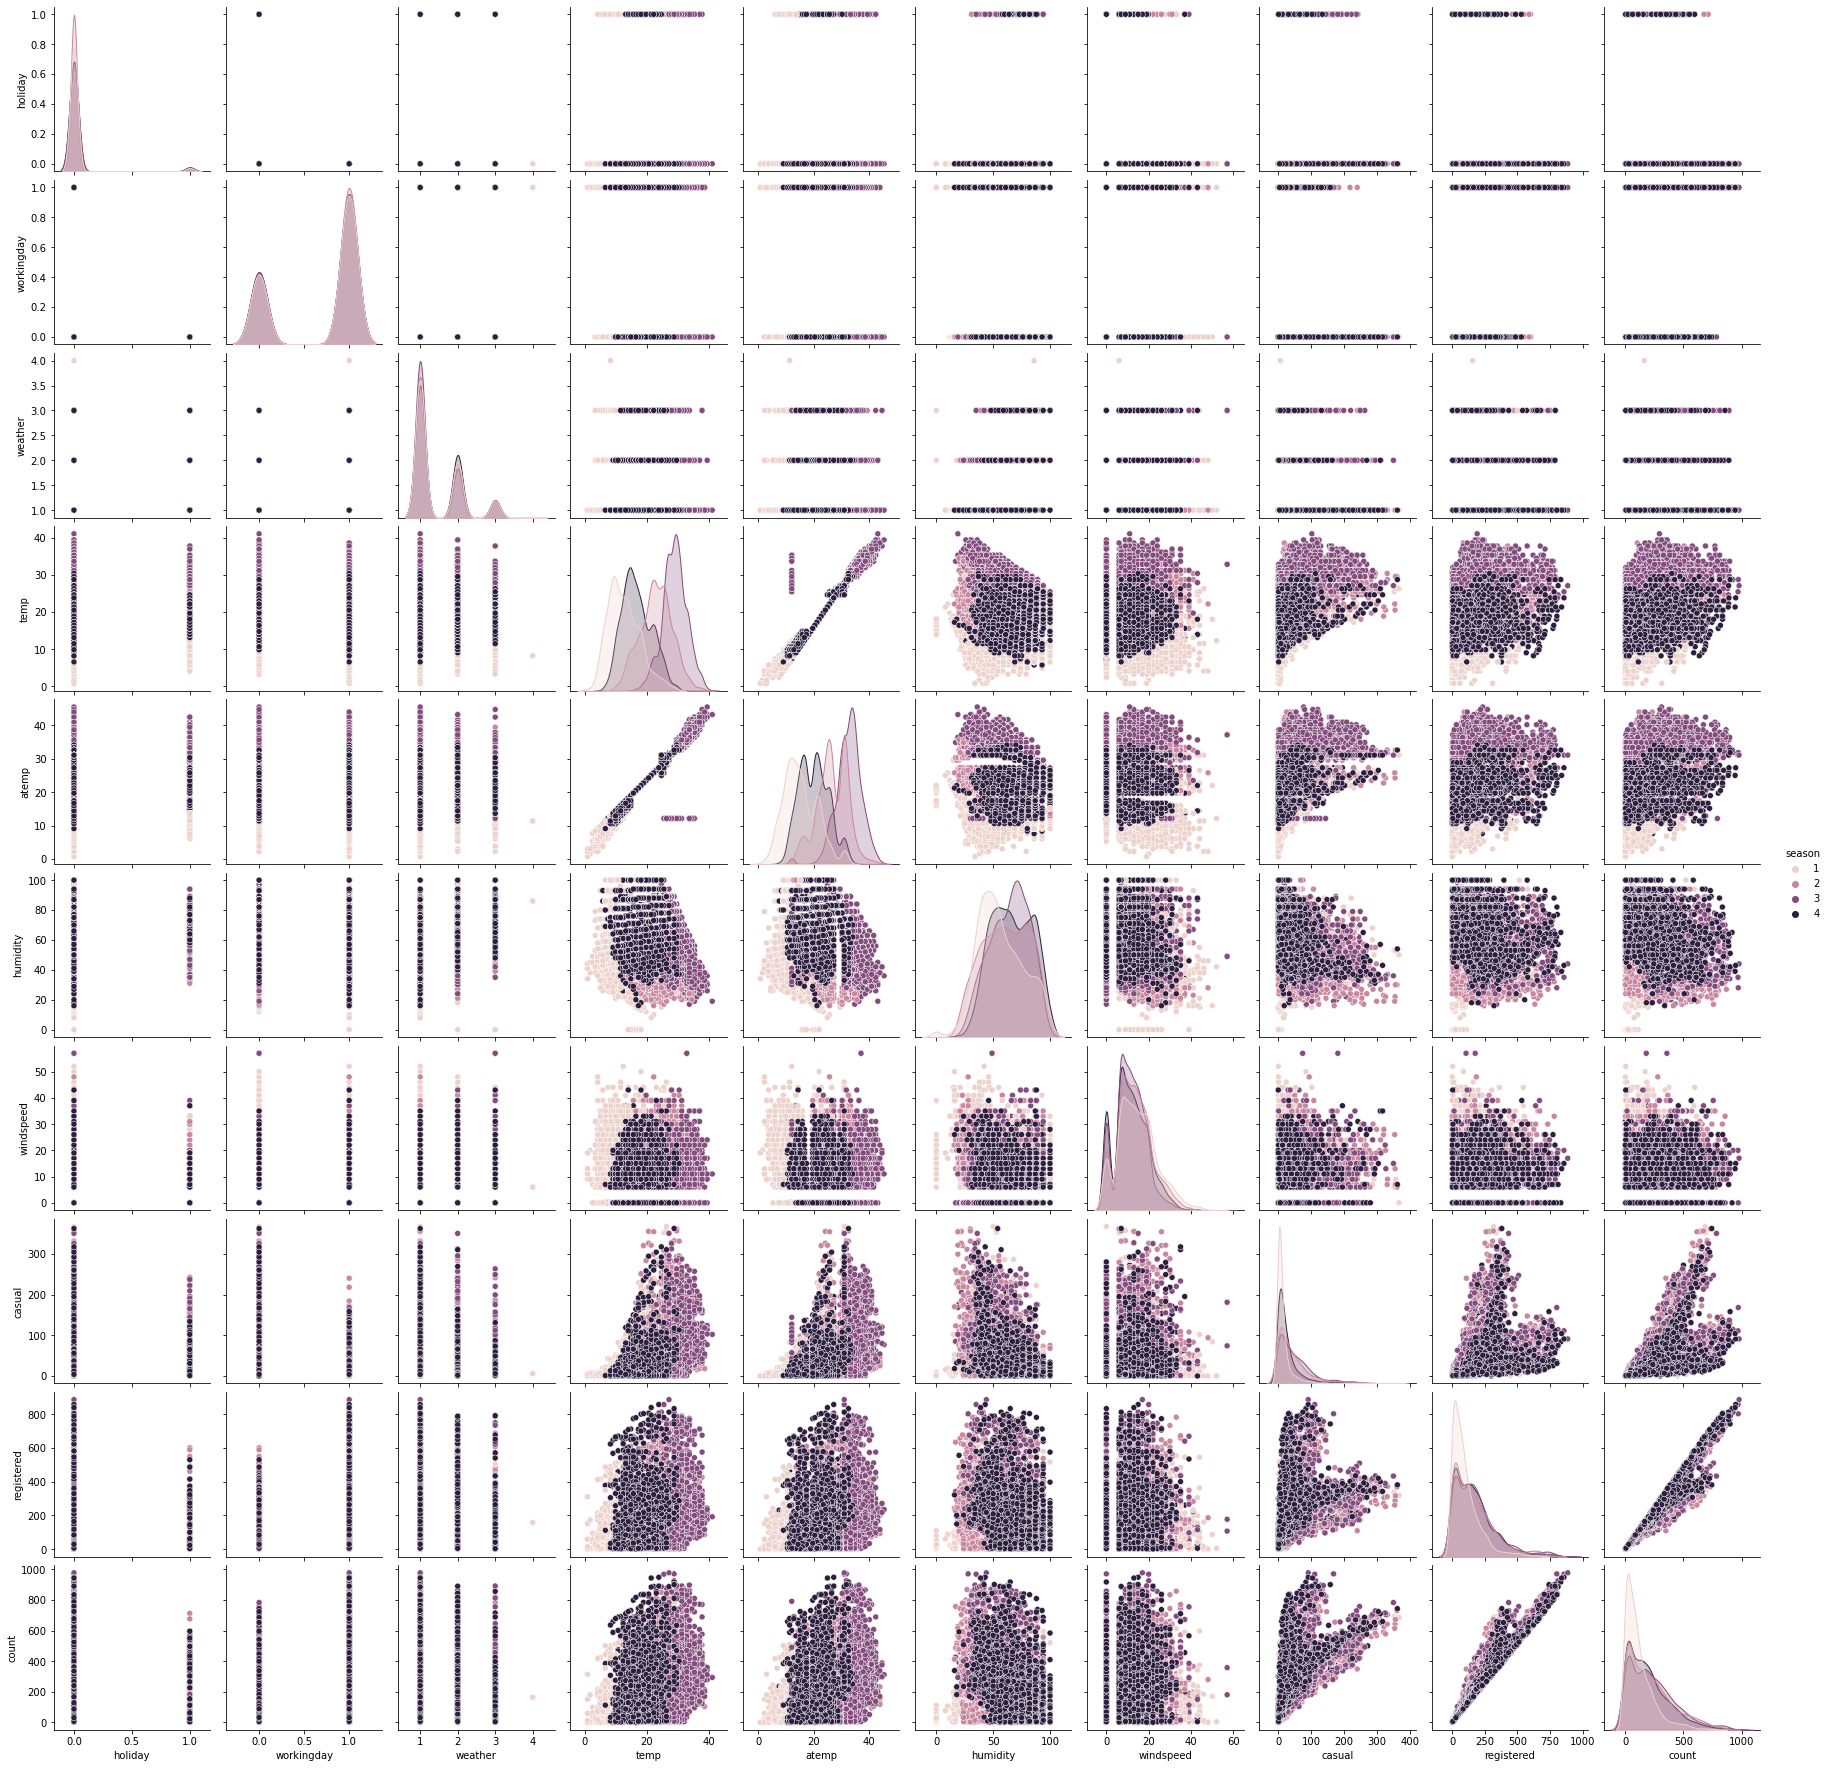

In [302]:
sns.pairplot(data=bike,hue='season')

In [312]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [316]:
mean_absolute_percentage_error(actual_count,model_pred_count)

<ipython-input-312-199972fad748>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


inf

In [317]:
bike.groupby("weather").registered.agg(["mean","median","count"])

,mean,median,count
weather,,,
1,164.928115,130,7192
2,148.170078,112,2834
3,101.403958,64,859
4,158.000000,158,1


<AxesSubplot:ylabel='weather'>

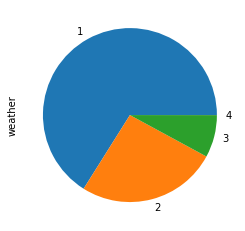

In [320]:
bike.weather.value_counts().plot(kind="pie")

In [321]:
def outlier_detect(bike):
    for i in bike.describe().columns:
        Q1=bike.describe().at['25%',i]
        Q3=bike.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(bike[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [323]:
numeric_columns     = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']

x=bike[numeric_columns]
outlier_detect(x)


 Outliers for Column :  season  Outliers count  0
[]

 Outliers for Column :  holiday  Outliers count  311
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [324]:
bike.nunique()


season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [332]:
 bike.corr()['count'] 

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64